# Pythonを使って音声の入出力

In [2]:
import pyaudio
from pathlib import Path
import itertools
import wave
import time
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [3]:
%matplotlib inline

In [4]:
audio_data_dir_path = Path('audio_data')
recording_data_dir_path = Path('recoding_data')

if not recording_data_dir_path.exists():
    recording_data_dir_path.mkdir(parents=True)

## 入出力環境の調査

In [61]:
p = pyaudio.PyAudio()

for host_index in range(0, p.get_host_api_count()):
    print(p. get_host_api_info_by_index(host_index))
    for device_index in range(0, p. get_host_api_info_by_index(host_index)['deviceCount']):
        print(p.get_device_info_by_host_api_device_index(host_index, device_index))

{'index': 0, 'structVersion': 1, 'type': 5, 'name': 'Core Audio', 'deviceCount': 3, 'defaultInputDevice': 1, 'defaultOutputDevice': 2}
{'index': 0, 'structVersion': 2, 'name': 'BenQ GL2460', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.009541666666666667, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.018875, 'defaultSampleRate': 48000.0}
{'index': 1, 'structVersion': 2, 'name': 'MacBook Proのマイク', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.04850340136054422, 'defaultLowOutputLatency': 0.01, 'defaultHighInputLatency': 0.05866213151927438, 'defaultHighOutputLatency': 0.1, 'defaultSampleRate': 44100.0}
{'index': 2, 'structVersion': 2, 'name': 'MacBook Proのスピーカー', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.009977324263038548, 'defaultHighInputLatency': 0.1, 'defaultHighOutputL

## 音声の入力

In [22]:
file_path = recording_data_dir_path.joinpath('sample_curry.wav')

In [24]:
DEVICE_INDEX = 1
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
SAMPLE_RATE = 16000

data_time = 5

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=SAMPLE_RATE,
    input=True,
    input_device_index=DEVICE_INDEX,
    frames_per_buffer=CHUNK
)

print("recording ...")

frames = []

for i in range(0, int(SAMPLE_RATE / CHUNK * data_time)):
    data = stream.read(CHUNK)
    frames.append(data)

print("done.")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(file_path.__str__(), 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(SAMPLE_RATE)
wf.writeframes(b''.join(frames))
wf.close()

recording ...
done.


### 入力した音声をグラフ化する

In [143]:
def _update(x, y):
    plt.cla()
    plt.plot(x, y)

In [180]:
DEVICE_INDEX = 1
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 4800

data_time = 5

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    input_device_index=DEVICE_INDEX,
    frames_per_buffer=CHUNK
)

print("recording ...")

fig, ax = plt.subplots(1, 1)
plot_size = 500

x = np.arange(-plot_size+1, 1).tolist()
y = [0] * len(x)
lines, = ax.plot(x, y)

frames = []
start_num = 1
for i in range(0, int(RATE / CHUNK * data_time)):
    data = stream.read(CHUNK)
    result = np.frombuffer(data, dtype='int16') / float(2**15)
    
    x.extend((np.arange(0, len(result)) + 1 + start_num).tolist())
    y.extend(result.tolist())
    x = x[len(result):]
    y = y[len(result):]
    print(np.max(y))
        
    lines.set_data(x, y)
    ax.set_xlim(np.min(x), np.max(x))
    plt.pause(0.1)
     
    start_num += len(result)

    frames.append(data)

print("done.")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(file_path.__str__(), 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

recording ...


<IPython.core.display.Javascript object>

0.04705810546875
0.053619384765625
0.055938720703125
0.039703369140625
0.04241943359375
0.032989501953125
0.03021240234375
0.027374267578125
0.06341552734375
0.051422119140625
0.0635986328125
0.054840087890625
0.037689208984375
0.055023193359375
0.022674560546875
0.012969970703125
0.014862060546875
0.01397705078125
0.016021728515625
0.01409912109375
0.056304931640625
0.024566650390625
0.05126953125
done.


### 入力音声のプロット

In [185]:
print(result)

[ 0.00897217  0.00723267 -0.00582886 ...  0.00592041  0.00256348
 -0.00244141]


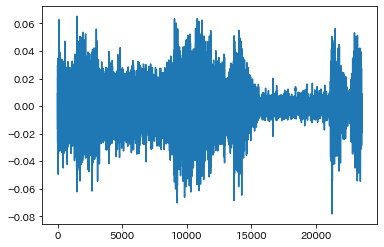

In [184]:
result = b''.join(frames)
result = np.frombuffer(result, dtype='int16') / float(2**15)

plt.plot(result)

## 音声の出力

In [1]:
file_path = audio_data_dir_path.joinpath('meeting_audio_sample.wav')

NameError: name 'audio_data_dir_path' is not defined

In [7]:
file_path = recording_data_dir_path.joinpath('senses_insight_meeting.wav')

In [25]:
DEVICE_INDEX = 0
CHUNK = 1024

wf = wave.open(file_path.__str__(), "rb")

p = pyaudio.PyAudio()

stream = p.open(
    format=p.get_format_from_width(wf.getsampwidth()),
    channels=wf.getnchannels(),
    rate=wf.getframerate(),
    input_device_index = DEVICE_INDEX,
    output=True
)

data = wf.readframes(CHUNK)
 
# Streamに読み取ったデータを書き込む＝再生する
while len(data) > 0:
    # Streamに書き込む
    stream.write(data)
 
    # 再度チャンクサイズだけ読み込む。これを繰り返す
    data = wf.readframes(CHUNK)
 
# Streamを止めて、closeする。closeしなければ、start_stream()で再開できる
stream.stop_stream()
stream.close()
 
# PyAudioインスタンスを破棄する
p.terminate()
wf.close()


In [15]:
output_file_path = audio_data_dir_path.joinpath('meeting_senses_insight.wav')
CHANNELS = 1
FORMAT = pyaudio.paInt16

In [9]:
wf = wave.open(file_path.__str__(), "rb")

In [11]:
frames = []wf.readframes(SAMPLE_RATE * 5)

In [20]:
p = pyaudio.PyAudio()
stream = p.open(
    format=p.get_format_from_width(wf.getsampwidth()),
    channels=wf.getnchannels(),
    rate=wf.getframerate(),
    input_device_index = DEVICE_INDEX,
    output=True
)

stream.write(frames)

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(output_file_path.__str__(), 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(SAMPLE_RATE)
wf.writeframes(frames)
wf.close()

In [ ]:
wf.close()

In [ ]:
frames = []

for i in range(0, int(SAMPLE_RATE / CHUNK * data_time)):
    data = stream.read(CHUNK)
    frames.append(data)

print("done.")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(file_path.__str__(), 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(SAMPLE_RATE)
wf.writeframes(b''.join(frames))
wf.close()

## リアルタイムで音声入力

In [133]:
CHUNK = 1034
RATE = 44100

p = pyaudio.PyAudio()

stream = p.open(
    format = pyaudio.paInt16,
    channels = 1,
    rate = RATE,
    frames_per_buffer = CHUNK,
    input = True,
    output = True
)

while stream.is_active():
    input_data = stream.read(CHUNK)
    output_data = stream.write(input_data)
    
stream.stop_stream()
stream.close()
p.terminate()

print('Stop Streeming')

KeyboardInterrupt: 

In [11]:
file_path = audio_data_dir_path.joinpath('meeting_audio_sample.m4a')

In [4]:
from utils import *

In [5]:
import subprocess

file_path = audio_data_dir_path.joinpath('meeting_audio_sample.m4a')

target_file_path = file_path
output_file_path = audio_data_dir_path.joinpath(file_path.name.replace('.m4a', '.wav'))

convert_from_m4a_to_wav(
    target_file_path,
    output_file_path
)